In [1]:
import pandas as pd
from numpy import var, std, mean
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

covid = pd.read_csv("Colombia_COVID19_Coronavirus_casos_diarios.csv")

# A review of the reported daily Covid cases in Colombia 

In [2]:
print(covid.head())

   OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS  \
0       552             1            1              0                  0   
1       553             0            1              0                  0   
2       554             0            1              0                  0   
3       555             2            3              0                  0   
4       556             0            3              0                  0   

      FECHA_ACTUALIZACION                              GlobalID  \
0  2020/03/06 05:00:00+00  2cfd33e7-935e-466d-be97-cd9c1d3dfd74   
1  2020/03/07 05:00:00+00  2ed4fae9-ea93-4293-b022-07daa41de2bf   
2  2020/03/08 05:00:00+00  5963f6b6-a3ba-4a24-9cf8-f72a13c7d9d2   
3  2020/03/09 05:00:00+00  ba20e7c9-1abc-4921-a29f-d61c198b7863   
4  2020/03/10 05:00:00+00  87e523f6-d767-4f41-a04c-371b7f46bf52   

   NUEVOS_MUERTOS  NUEVO_RECUPERADOS  
0               0                  0  
1               0                  0  
2               0      

The columns would be renamed and the columns `GlobalID` and `OBJECTID` would be reviewed, as they seem to have no statistical purpose, just an id.

In [3]:
def exploration(columns):
    rows, cols = covid.shape

    Rows_Global_Id = len(covid["GlobalID"].unique())

    Rows_Object_Id = len(covid['OBJECTID'].unique())

    for col in columns:
        amount = len(covid[col].unique())
        message = "Every value in column {} is unique".format(col) if rows == len(covid[col].unique()) else "Not every value in {} is unique".format(col)
        print(message)
        
columns = ["GlobalID","OBJECTID"]        

exploration(columns)

Every value in column GlobalID is unique
Every value in column OBJECTID is unique


In [4]:
def delete_columns(columns):
    covid.drop(columns,axis=1,inplace=True)
    
delete_columns(columns)

In [5]:
def rename_columns():
    covid.rename(columns = {
        'NUEVOS_CASOS':'NEW_CASES',
        'TOTAL_CASOS':'TOTAL_CASES',
        'TOTAL_MUERTES':'TOTAL_DEATHS',
        'TOTAL_RECUPERADOS':'TOTAL_RECOVERED',
        'FECHA_ACTUALIZACION':'DATE_OF_REPORT',
        'NUEVOS_MUERTOS':'NEW_DEATHS',
        'NUEVO_RECUPERADOS':'NEW_RECOVERED'
    }
                 ,inplace=True)

print(covid.columns)
rename_columns()
print(covid.columns)

Index(['NUEVOS_CASOS', 'TOTAL_CASOS', 'TOTAL_MUERTES', 'TOTAL_RECUPERADOS',
       'FECHA_ACTUALIZACION', 'NUEVOS_MUERTOS', 'NUEVO_RECUPERADOS'],
      dtype='object')
Index(['NEW_CASES', 'TOTAL_CASES', 'TOTAL_DEATHS', 'TOTAL_RECOVERED',
       'DATE_OF_REPORT', 'NEW_DEATHS', 'NEW_RECOVERED'],
      dtype='object')


In [6]:
print(covid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NEW_CASES        563 non-null    int64 
 1   TOTAL_CASES      563 non-null    int64 
 2   TOTAL_DEATHS     563 non-null    int64 
 3   TOTAL_RECOVERED  563 non-null    int64 
 4   DATE_OF_REPORT   563 non-null    object
 5   NEW_DEATHS       563 non-null    int64 
 6   NEW_RECOVERED    563 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 30.9+ KB
None


The 'DATE_OF_REPORT' column would be changed into the appropriate 'datetime' format. 

In [7]:
date = list(covid["DATE_OF_REPORT"])

print(type(date))

date = [x[:10] for x in date]

print(date[0])

date = [pd.to_datetime((x),format = "%Y/%m/%d") for x in date]

print(date[0])

print(type(date[0]))

date_of_report = pd.Series(date)

covid["DATE_OF_REPORT"] = date_of_report


<class 'list'>
2020/03/06
2020-03-06 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


The columns are going to be rearranged

In [8]:
covid = covid[['DATE_OF_REPORT','NEW_CASES','TOTAL_CASES','NEW_RECOVERED','TOTAL_RECOVERED','NEW_DEATHS','TOTAL_DEATHS']]
print(covid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE_OF_REPORT   563 non-null    datetime64[ns]
 1   NEW_CASES        563 non-null    int64         
 2   TOTAL_CASES      563 non-null    int64         
 3   NEW_RECOVERED    563 non-null    int64         
 4   TOTAL_RECOVERED  563 non-null    int64         
 5   NEW_DEATHS       563 non-null    int64         
 6   TOTAL_DEATHS     563 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 30.9 KB
None


## A review of the columns with integer columns

In [9]:
covid.describe()

,NEW_CASES,TOTAL_CASES,NEW_RECOVERED,TOTAL_RECOVERED,NEW_DEATHS,TOTAL_DEATHS
count,563.000000,5.630000e+02,563.000000,5.630000e+02,563.000000,563.000000
mean,8776.165187,1.817702e+06,8489.381883,1.691804e+06,223.612789,47694.685613
std,7512.047224,1.638940e+06,7507.712693,1.579382e+06,171.316244,41054.850725
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,3033.000000,2.371680e+05,2109.500000,1.167655e+05,95.000000,8122.000000
50%,7523.000000,1.417072e+06,7209.000000,1.310425e+06,187.000000,38866.000000
75%,12085.500000,2.885700e+06,12499.500000,2.693496e+06,325.000000,74457.500000
max,33594.000000,4.941064e+06,37904.000000,4.779552e+06,754.000000,125895.000000


## Looking at the first and last rows to verify if the information look correct

In [10]:
print(covid.head())

print(covid.tail())

  DATE_OF_REPORT  NEW_CASES  TOTAL_CASES  NEW_RECOVERED  TOTAL_RECOVERED  \
0     2020-03-06          1            1              0                0   
1     2020-03-07          0            1              0                0   
2     2020-03-08          0            1              0                0   
3     2020-03-09          2            3              0                0   
4     2020-03-10          0            3              0                0   

   NEW_DEATHS  TOTAL_DEATHS  
0           0             0  
1           0             0  
2           0             0  
3           0             0  
4           0             0  
    DATE_OF_REPORT  NEW_CASES  TOTAL_CASES  NEW_RECOVERED  TOTAL_RECOVERED  \
558     2021-09-15       1570      4934568           1774          4772899   
559     2021-09-16       1484      4936052           1762          4774661   
560     2021-09-17       1544      4937596           1508          4776169   
561     2021-09-18       1655      4939251         

## A review of the data shown by the column NEW_CASES would be shown

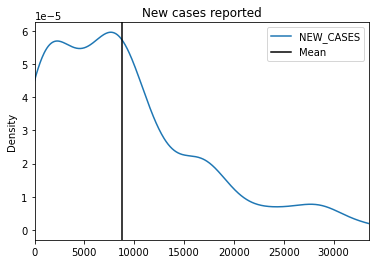

In [11]:
nc = covid["NEW_CASES"]
nc.plot.kde(xlim = [nc.min(),nc.max()])
mean = nc.mean()
plt.axvline(mean,color = 'black',label = 'Mean')
plt.title("New cases reported")
plt.legend();


By reviewing the 'NEW_CASES' column, we can see that there are two peaks: one near 2500 new cases and the other near at 8000 new cases, and the mean near 8800 new cases. This mean that the majority of newly reported cases are in the range of 2500 and 8000. As the amount of new cases reported increase, the amount reported decrease. 

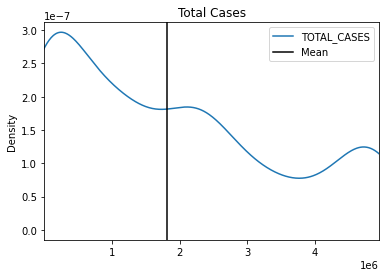

In [12]:
tc = covid["TOTAL_CASES"]
tc.plot.kde(xlim = [tc.min(),tc.max()])
mean = tc.mean()
plt.axvline(mean,color = 'black',label = 'Mean')
plt.title("Total Cases")
plt.legend();

By reviewing the 'TOTAL_CASES' column, we can see that the graph is decreasing until it reaches around 3.8 million cases, which means that until that point, there new contagious at a fast rate. Since that amount, the amount of total cases reported increased, which means that the rate of contagious decreased, as new cases were not reported as fast. 

## Analizing the rate between deaths and cases

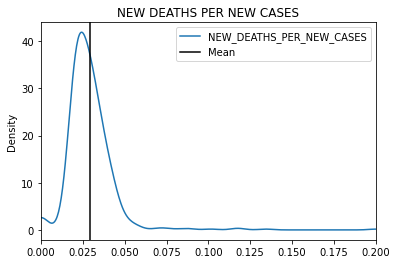

In [13]:
covid['NEW_DEATHS_PER_NEW_CASES'] = covid['NEW_DEATHS']/covid['NEW_CASES']

mcn = covid["NEW_DEATHS_PER_NEW_CASES"]
mcn.plot.kde(xlim = [mcn.min(),mcn.max()])
mean = mcn.mean()
plt.axvline(mean,color = 'black',label = 'Mean')
plt.title("NEW DEATHS PER NEW CASES")
plt.legend();

By reviewing the rate between 'NEW_DEATHS' and 'NEW_CASES, we can see that the most common rate is 2.5%, which means a low death rate when we see at the new deaths and the new cases relation.

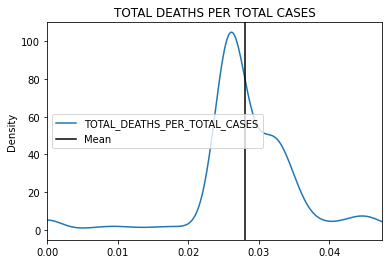

In [14]:
covid['TOTAL_DEATHS_PER_TOTAL_CASES'] = covid['TOTAL_DEATHS']/covid['TOTAL_CASES']

mct = covid["TOTAL_DEATHS_PER_TOTAL_CASES"]
mct.plot.kde(xlim = [mct.min(),mct.max()])
mean = mct.mean()
plt.axvline(mean,color = 'black',label = 'Mean')
plt.title("TOTAL DEATHS PER TOTAL CASES")
plt.legend();

By reviewing the rate between 'TOTAL_DEATHS' and 'TOTAL_CASES', we  can see that the most common rate is 2.5%, which is consistent with what was seen in the previous graph. 

## Analizing the rate between recovered and cases

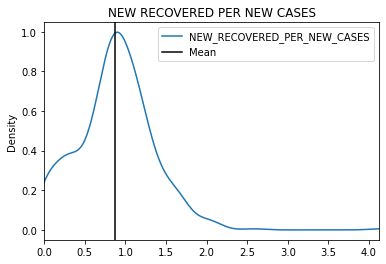

In [15]:
covid['NEW_RECOVERED_PER_NEW_CASES'] = covid['NEW_RECOVERED']/covid['NEW_CASES']

rcn = covid["NEW_RECOVERED_PER_NEW_CASES"]
rcn.plot.kde(xlim = [rcn.min(),rcn.max()])
mean = rcn.mean()
plt.axvline(mean,color = 'black',label = 'Mean')
plt.title("NEW RECOVERED PER NEW CASES")
plt.legend();

By reviewing the rate between 'NEW_RECOVERED' and 'NEW_CASES', we see that the most popular rate is near the mean, which means near 90%. This shows that the majority of the recovered patients are recovering almost at the same rate as new cases are reported. 

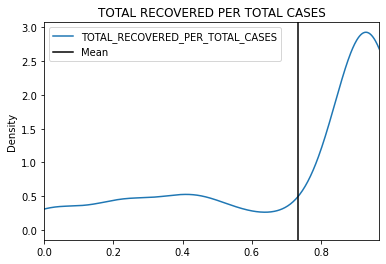

In [17]:
covid['TOTAL_RECOVERED_PER_TOTAL_CASES'] = covid['TOTAL_RECOVERED']/covid['TOTAL_CASES']

rct = covid["TOTAL_RECOVERED_PER_TOTAL_CASES"]
rct.plot.kde(xlim = [rct.min(),rct.max()])
mean = rct.mean()
plt.axvline(mean,color = 'black',label = 'Mean')
plt.title("TOTAL RECOVERED PER TOTAL CASES")
plt.legend();

By reviewing the rate between 'TOTAL_RECOVERED' and 'TOTAL_CASES', we see that the most popular rate is near 90%. This is consistent with the findings in the previous graph.

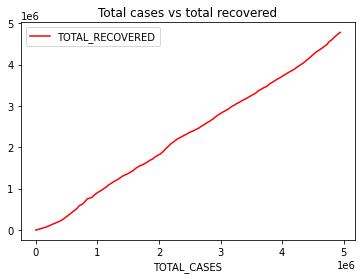

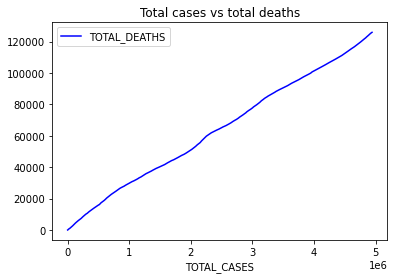

In [22]:
covid.plot(kind='line',x='TOTAL_CASES',y='TOTAL_RECOVERED',color='red',title = "Total cases vs total recovered")
covid.plot(kind='line',x='TOTAL_CASES',y='TOTAL_DEATHS',color='blue',title = "Total cases vs total deaths")
plt.show()


When plotting the relation between total recovered and total cases, as well as the relation between total deaths and total cases, we can see a linear ascending relation.

For the first graph, we can see that the relation is almost 1:1, which is consistent with the rate graph which showed that the rate was close to that value.

For the second graph, we see that the relation is almost 3:5, which means that around 60% of the cases ended in death. 

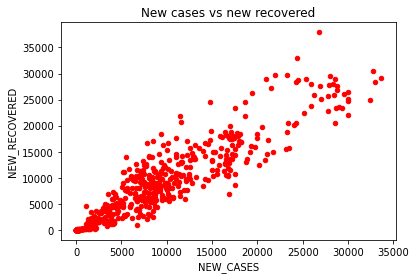

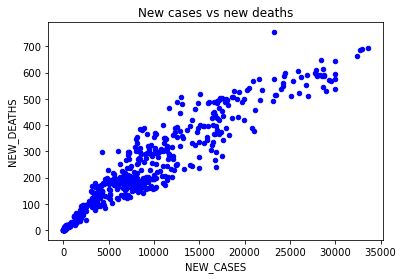

In [23]:
covid.plot(kind='scatter',x='NEW_CASES',y='NEW_RECOVERED',color='red',title = "New cases vs new recovered")
covid.plot(kind='scatter',x='NEW_CASES',y='NEW_DEATHS',color='blue',title = "New cases vs new deaths")
plt.show()

We can see that the relation between new cases and new recovered, as well as the relation between new cases and new deaths is a positive relation. 

The greatest density is between 5000 and 10000 new cases in both graph, but while the values are spread with respect of a linear relation in the first graph, in the second graph values are close to a linear relation.

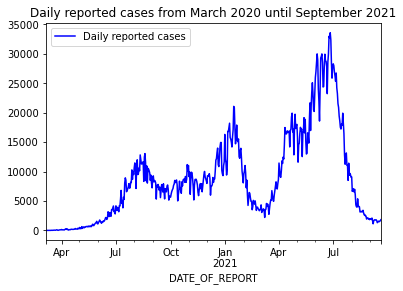

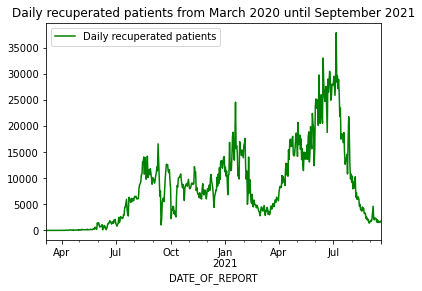

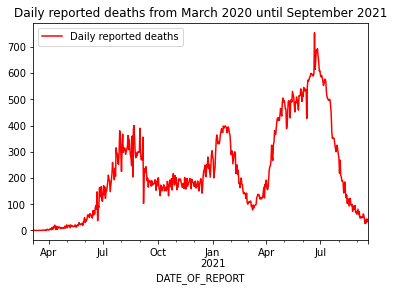

In [24]:
covid.plot(kind='line', x='DATE_OF_REPORT', y='NEW_CASES', color='blue', title = "Daily reported cases from March 2020 until September 2021",label = "Daily reported cases")
covid.plot(kind='line', x='DATE_OF_REPORT', y='NEW_RECOVERED', color='green', title = "Daily recuperated patients from March 2020 until September 2021",label = "Daily recuperated patients")
covid.plot(kind='line', x='DATE_OF_REPORT', y='NEW_DEATHS', color='red', title = "Daily reported deaths from March 2020 until September 2021",label = "Daily reported deaths")
plt.show()

It can be seen a strong relation between the daily reported cases, daily recuperated and daily deaths, the graphs have a similar shape between them. 

We can appreciate a peak at the holiday seasons, around July and December. The last peak shows that in the last holiday season, which is July 2021, there were a majority of contagious, deaths and recovered patients, since then, the graph decreased at a fast pace. 